# Supervised learning

지도 학습의 예를 살펴보자. 먼저 포트랜드 주 자택의 면적과 가격에 대한 예제를 살펴보겠다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_rand_df(col_name, length) :
    whole_list = []
    for i in range(length) :
        whole_list.append([random.randint(1000,3000), random.randint(200,900)])
    temp_df = pd.DataFrame(whole_list, columns = col_name )
    temp_df1 = temp_df.sort_values(by='Living Area')['Living Area'].tolist()
    temp_df2 = temp_df.sort_values(by='Price')['Price'].tolist()
    
    temp_df['Living Area'] = temp_df1
    temp_df['Price'] = temp_df2
    
    temp_df = temp_df.sample(frac=1).reset_index(drop=True)
    return temp_df

temp_df = gen_rand_df(['Living Area', 'Price'], 40)
temp_df

,Living Area,Price
0,1803,506
1,2552,778
2,1549,425
3,2801,847
4,2575,788
5,2079,643
6,1037,209
7,1925,543
8,1433,402
9,2509,771


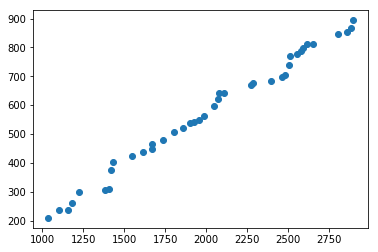

In [2]:
plt.scatter(temp_df['Living Area'], temp_df['Price'])
plt.show()

이런 데이터가 주어졌을 때, 포트랜드 집값을 어떻게 예측할 수 있을까?

**입력 변수(input var, input feature)**를 $x^{(i)}$, **결과 변수(output var, target var)**를 $y^{(i)}$ 라고 하자.

$(x^{(i)}, y^{(i)})$ 쌍은 **트레이닝 예제(training example)**이라고 하고, 

트레이닝 예제가 m개 있는  $\{(x^{(i)}, y^{(i)}); i = 1, ..., m\}$를 **트레이닝 셋(training set)**이라고 한다.

또한 $\chi$ 는 입력 값들의 공간을 나타내고, $\Upsilon$는 출력 값들의 공간을 나타낸다.


지도 학습에서, 우리의 목표는 트레이닝 셋이 주어졌을 때 $ h : \chi ->  \Upsilon$로 가는 함수를 찾는 것이다. 

그래서 $h(x)$가 y의 좋은 예측치가 되도록 하는 것이다.

이 함수 h를 **가설(hypothesis)**이라고 한다.

* 우리가 예측하려는 타겟 변수가 연속형이면 **회귀 문제(regression problem)**이라고 한다.
* 타겟 변수가 이산형 값을 가지면 **분류 문제(Classification problem)** 이라고 한다.

<br>
## Part 1. Linear Regression

좀 더 큰 관점에서 보기위해, 위 예제에 침실이라는 변수 하나를 추가해보자.

In [3]:
def gen_rand_df2(col_name, length) :
    whole_list = []
    for i in range(length) :
        whole_list.append([random.randint(1000,3000), random.randint(0,4), random.randint(200,900)])
    temp_df = pd.DataFrame(whole_list, columns = col_name )
    temp_df1 = temp_df.sort_values(by='Living Area')['Living Area'].tolist()
    temp_df2 = temp_df.sort_values(by='Bedrooms')['Bedrooms'].tolist()
    temp_df3 = temp_df.sort_values(by='Price')['Price'].tolist()
    
    temp_df['Living Area'] = temp_df1
    temp_df['Bedrooms'] = temp_df2
    temp_df['Price'] = temp_df3
    
    temp_df = temp_df.sample(frac=1).reset_index(drop=True)
    return temp_df

temp_df2 = gen_rand_df2(['Living Area', 'Bedrooms', 'Price'], 40)
temp_df2

,Living Area,Bedrooms,Price
0,1555,1,335
1,2714,4,730
2,1567,1,355
3,1709,1,364
4,1320,0,232
5,2680,4,722
6,2409,3,579
7,2854,4,894
8,1356,0,273
9,1878,2,438


여기서 입력 변수($x$)는 $R^2$의 2차원 벡터이다.

예를 들어, 

- $x_1^{i}$ 는 트레이닝 셋의 i번째 집의 Living Area 이고,
-  $x_2^{i}$ 는 트레이닝 셋의 i번째 집의 Bedrooms 이다.

일반적으로, 이러한 알고리즘을 학습할 때는 어떤 특징(feature)을 사용할 것인가는 사용자에게 달려있다.

나중에는 이러한 특징을 고르는 방법들에 대해서도 이야기할 것이다.

지도 학습을 위해, 컴퓨터에서 어떻게 함수/가설인 $h$를 표현할 것인지를 결정해야 한다.

일단은 우리가 $y$를 $x$의 선형 함수로 근사한다고 해보자.

<br>
$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$
<br>

여기서 $\theta_i$는 **파라미터 혹은 가중치(parameters, weights)**라고 불리며, 입력 변수 공간  $\chi$에서 출력 변수 공간 $\Upsilon$ 으로 매핑하는 역할을 한다.

절편인 $x_0$ 를 1로 두고 더 간단히 표현하면,

<br>
$$ h(x) = \sum_{i=0}^n\theta_i x_i = \theta^T x$$
<br>

자 이제 트레이닝 셋이 주어졌다. 그럼 어떻게 적절한 파라미터인 $\theta$를 고를까?

합리적인 방법은 $h(x)$가 $y$에 근사하도록 (적어도 트레이닝 셋에 대해서) 만드는 것이다.

다시 말해, 각 $\theta$ 값에 대해, $h(x^{i})$가 대응하는 $y^{i}$에 얼마나 가까운지를 측정하는 함수를 만들 수 있다.

*이를 수학적으로 표현해보면,*  다음과 같은 **비용 함수(Cost function)**을 정의할 수 있다.

<br>
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} ) ^2 $$
<br>

이전에 선형 회귀를 본적이 있다면, 이 식이 **최소제곱법(Ordinary Least Squares)** 회귀 모델을 만든 **least-squares cost function**과 유사하다는 것을 알 것이다. 

이에 대해 자세히 알아보자.

In [4]:
def computeCost(theta, x, y) :
    matrixX = np.array(x).reshape(len(x), -1)
    matrixY = np.array(y).reshape(len(y), -1)
    theta = np.array(theta).reshape(len(theta), -1)
    m = len(x)
    return (1/(2*m)*np.dot( (np.dot(matrixX, theta)- matrixY).T, (np.dot(matrixX, theta)- matrixY) )).item(0)

batchExample = gen_rand_df(['Living Area', 'Price'], 60)
batchExample['Intercept'] = 1
computeCost([0,0], batchExample[['Intercept', 'Living Area']], batchExample['Price'])

170212.58333333334

In [149]:
batchExample

,Living Area,Price,Intercept
0,1466,421,1
1,2203,742,1
2,1075,308,1
3,2457,800,1
4,2941,859,1
5,2227,752,1
6,1850,619,1
7,2009,689,1
8,1042,254,1
9,1919,667,1


### 1. LMS Algorithm (Least-mean squares)

다시 되돌아가서, 우리는 $J(\theta)$를 최소화 할 수 있는 $\theta$를 찾고 싶다.

그렇게 하기 위해, $\theta$에 대한 초기값을 정하고 시작하는 탐색 알고리즘을 사용해보자.

이 알고리즘은 반복적으로 $\theta$값을 변경하여 $J(\theta)$를 작게 만들어 하나의 값에 수렴하게 된다.

특히, **경사하강법(그래디언트 디센트, Gradient Descent)** 알고리즘을 살펴보자. 

<br>
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$
$$ j = 0, ..., n $$
<br>

여기서, $\alpha$는 **학습률(learning rate)**이고, 얼마나 나아갈지를 정해주는 값이다.

이 알고리즘을 구현하기 위해, 오른쪽 항의 편미분항이 어떤 것인지를 알아야 한다.

먼저 트레이닝 예제가 하나 있는 $(x, y)$의 경우를 살펴보자. 이 경우, 비용 함수($J$)에 있는 합을 무시할 수 있다.

<br>
$$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{\partial}{\partial \theta_j}\frac{1}{2}(h_\theta(x) - y)^2$$

$$ = 2 * \frac{1}{2} (h_\theta(x) - y)* \frac{\partial}{\partial \theta_j} (h_\theta(x) - y) $$

$$ = (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j}( \sum_{i=0}^n \theta_i x_i - y) $$

$$ = (h_\theta(x)-y) x_j $$
<br>

하나의 트레이닝 예제에 대해, 이것은 다음과 같은 업데이트 규칙을 의미한다.

<br>
$$ \theta_j := \theta_j - \alpha (h_\theta(x^{(i)}) - y^{(i)}  ) x_j^{(i)}$$
<br>



이 규칙은 **LMS 업데이트 규칙**이라고 하며, **Widrow-Hoff 학습 규칙**이라고도 한다.

<br>
*** 중요한 사실은, $\theta_0$ 와 $\theta_1$ 에 대한 업데이트가 동시에 이루어져야 한다는 것이다!! ***


<br>
이제 단일 트레이닝 예제가 아닌, 하나의 트레이닝 셋에 대해 이 수식을 적용해보자.

###### a. Batch Gradient Descent

`Repeat Until Convergence` {

$$ \theta_j := \theta_j - \alpha \sum_{i=1}^m( h_\theta(x^{(i)}) - y^{(i)} )x_j^{(i)}$$ 
$$ j = 0, ..., n$$

}

사실 위 식은 원래 비용 함수인 $J$의 경사하강법과도 같다. 

이 방법은 매 단계에서 전체 트레이닝 셋의 모든 예제를 살펴보기 때문에, **배치 경사하강법** 이라고 한다.

*주의할 점은, 경사하강법이 일반적으로 지역최소값에 취약하지만, 여기서의 선형 회귀에서는 오직 하나의 전역최소값만을 갖기에 항상 수렴한다고 가정한다.*

<br>
우선 비용 함수의 3차원 그래프를 그려보자.

**아래 그림에서 최저점을 찾는 것이 경사하강법의 원리이다.**


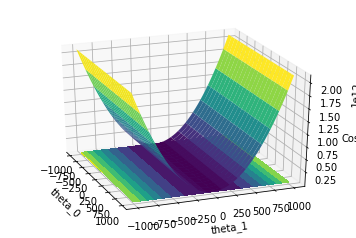

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-1000, 1000, 60)
theta_1 = np.linspace(-1000, 1000, 60)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
    # make (X,Y) coordinates (grid)
Z = []

for a, b in zip(np.ravel(theta_0), np.ravel(theta_1)) :
    Z.append(computeCost([a, b], batchExample[['Intercept', 'Living Area']], batchExample['Price']))
Z = np.array(Z).reshape(theta_0.shape)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(theta_0, theta_1, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
cset = ax.contourf(theta_0, theta_1, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost')
ax.view_init(27,- 21)
plt.show()

In [6]:
def batchGradientDescent(theta, x, y) :
    alpha = 0.001
    count = 1
    matrixX = np.array(x).reshape(len(x), -1)
    matrixY = np.array(y).reshape(len(y), -1)
    theta = np.array(theta).reshape(len(theta), -1)
    print(matrixX[:,1])
   
    theta = np.array(theta).reshape(len(theta), -1)
    m = len(x)
    print((np.dot(matrixX, theta) - matrixY).shape,"qwqwqw")
    print( (np.dot(matrixX, theta) - matrixY).shape)
    print(np.dot( (np.dot(matrixX, theta) - matrixY).flatten(), matrixX[:,1]))
    
    
    print(len(y))
    while(count < 20) :
        #print(computeCost(theta, x, y))
        
        theta[0] = theta[0] - alpha * np.sum( np.dot(matrixX, theta) - matrixY)/len(y)
        theta[1] = theta[1] - alpha * np.dot( (np.dot(matrixX, theta) - matrixY).T, matrixX[:,1])/len(y)
        
        
        print(theta)
        count += 1
from sklearn.linear_model import LinearRegression
Lr = LinearRegression().fit( batchExample[['Intercept','Living Area']], batchExample['Price'])
print(Lr.coef_)
        
batchGradientDescent([0,0.3222], batchExample[['Intercept','Living Area']], batchExample['Price'])

[ 0.          0.30651255]
[1370 2861 2918 2454 2375 2842 1977 2496 1123 1094 1215 1281 2579 1377 1626
 1095 1783 2318 2757 1512 1354 2767 1669 2398 1869 2026 1336 2738 1878 1416
 2088 1127 2184 2919 1838 2674 2120 1028 1102 1092 2694 1586 2470 1442 1524
 1681 2799 2932 1590 2504 2653 2618 2819 1125 1497 1484 2021 1108 1151 2578]
(60, 1) qwqwqw
(60, 1)
9508795.544
60
[[ -7.80989067e-02]
 [ -1.58005495e+02]]
[[  3.08456224e+02]
 [  6.63703727e+05]]
[[ -1.29338261e+06]
 [ -2.78288211e+09]]
[[  5.42310173e+09]
 [  1.16685139e+13]]
[[ -2.27388496e+13]
 [ -4.89256143e+16]]
[[  9.53430914e+16]
 [  2.05143153e+20]]
[[ -3.99769787e+20]
 [ -8.60157075e+23]]
[[  1.67621880e+24]
 [  3.60660437e+27]]
[[ -7.02831870e+27]
 [ -1.51223486e+31]]
[[  2.94694605e+31]
 [  6.34074055e+34]]
[[ -1.23564275e+35]
 [ -2.65864727e+38]]
[[  5.18100086e+38]
 [  1.11476022e+42]]
[[ -2.17237303e+42]
 [ -4.67414521e+45]]
[[  9.10867365e+45]
 [  1.95985048e+49]]
[[ -3.81923060e+49]
 [ -8.21757505e+52]]
[[  1.60138819e+

In [9]:
batchExample= batchExample[ ['Intercept', 'Living Area', 'Price']]
batchExample.to_csv("testcsv.csv", index=False)

###### b. Stochastic Gradient Descent

`Loop` {

$$ i = 1, ... , m $$
$$ \theta_j := \theta_j + \alpha ( y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}$$ 
$$ `every` j$$

}

이 알고리즘은 트레이닝셋을 돌며 하나의 트레이닝 예제에 대해서 파라미터를 업데이트한다. 

따라서 **확률 경사하강법**이라고 부른다. 

배치 경사하강법이 한 단계를 거치기 위해 전체 트레이닝 셋을 돌아야 하는 반면, 확률 경사하강법은 하나의 트레이닝 예제를 볼 때마다 한 단계를 나아갈 수 있다.

따라서 배치 경사하강법은 데이터의 총 개수가 크다면 그 연산량이 크고, 보통 확률 경사하강법이 배치보다 최소값에 더 빠르게 근접한다.

결론적으로, 트레이닝 셋이 큰 경우, 확률 경사하강법이 더 선호된다.

<br>
### 2. The normal equations

경사하강법은 $J$를 최소화하는 한 가지 방법이다. 이제 두 번째 방법을 살펴보자.

이번에는 반복 알고리즘에 의존하지 않고, 확실하게 최소화하는 방법을 알아볼 것이다. 

여기서 비용 함수인 $J$를 $\theta_j$에 대해 미분하고, 0으로 두어서 이를 최소화할 것이다. 

#### 2-2. Least squares revisited

트레이닝 셋이 주어졌을 때, 행렬 $X$가 m-by-n 행렬이라고 하자. (절편항을 더하면 m-by-n+1)

$X$는 각 $i$번째 행에 $x^{(i)}$의 값들이 들어있다. 즉, 특징 벡터는 n차원이며, 데이터의 개수가 m개이다.

$\vec{y}$는 m차원 (열)벡터이며, $y^{(i)}$의 타겟 변수가 들어있다.

$h_\theta(x^{(i)}) = (x^{(i)})^T\theta$ 이므로, 다음의 식을 확인할 수 있다.

<br>
$$ X\theta - \vec{y} = [ (h_\theta(x^{(1)})-y^(1)), ... ,(h_\theta(x^{(m)})-y^(m))]^T  $$
<br>

 $$ z^Tz = \sum_{i}z_i^2 $$ 

이때, 위 식이 성립하므로,
$$ \frac{1}{2}(X \theta - \vec{y})^T(X \theta - \vec{y}) = \frac{1}{2} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$$

$$ = J(\theta)$$

마지막으로 $J$를 최소화하기 위해, $\theta$에 대해 미분해준다.

<br>
$\nabla_\theta J(\theta)$

$ = \nabla_\theta \frac{1}{2}(X\theta-\vec{y})^T(X\theta-\vec{y})$

$ = \frac{1}{2}\nabla_\theta(\theta^TX^TX\theta-\theta^TX^T\vec{y}-\vec{y}^TX\theta+\vec{y}^T\vec{y}$

$ = \frac{1}{2}\nabla_\theta tr(\theta^TX^TX\theta-\theta^TX^T\vec{y}-\vec{y}^TX\theta+\vec{y}^T\vec{y})$

$ = \frac{1}{2}\nabla_\theta(tr\theta^TX^TX\theta - 2tr\vec{y}^TX\theta)$

$ = X^TX\theta - X^T\vec{y}$

이제 위 식을 0으로 놓으면,

$$ X^TX\theta = X^T\vec{y} $$ 

***결국, 아래와 같은 정규방정식(normal equation)을 얻을 수 있다.***

$$ \theta = (X^TX)^{-1}X^T\vec{y}$$

In [142]:
temp_df = gen_rand_df(['Living Area','Price'], 40)
temp_df.head(3)

,Living Area,Price
0,1396,329
1,1372,246
2,1391,319


In [143]:
def normal_equation(x, y) :

    matrix_X = np.matrix( [x.loc[i] for i in range(len(x))]).reshape(len(x), -1)
    matrix_Y = np.matrix( [y.loc[i] for i in range(len(y))]).reshape(len(y), -1)
    
    matrix_W = np.linalg.inv(matrix_X.T * matrix_X)*matrix_X.T*matrix_Y
    print(matrix_W)
    return matrix_W

[[ 0.24217694]]


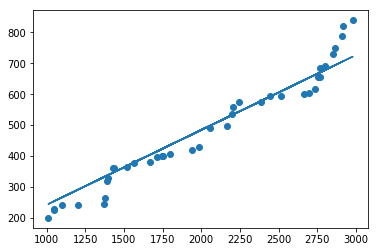

In [144]:
w_1 = normal_equation(temp_df['Living Area'], temp_df['Price'])

plt.scatter(temp_df['Living Area'], temp_df['Price'])
plt.plot(temp_df['Living Area'], temp_df['Living Area'] * w_1[0,0])
plt.show()

<br>
### 3. Probabilistic interpretation

회귀 문제를 해결할 때, 왜 선형 회귀가, 특히 최소자승법을 이용한 비용 함수 $J$가 합리적인 선택일까?

여기서는 확률적인 가정이 주어졌을 때, 최소자승법이 아주 자연스러운 해결책이라는 것을 밝혀낼 것이다.

타겟 변수와 입력 변수가 다음과 같은 관계를 가진다고 가정하자.

<br>
$$ y^{(i)} = \theta^Tx^{(i)}  + \epsilon^{(i)}$$
<br>

여기서 입실론은 모델이 설명할 수 없는 오차를 나타내거나, 임의의 노이즈를 표현하는 항이다.

더 나아가서, 이 $\epsilon^{(i)}$이 IID하게 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따른다고 가정하자.

이때, $pdf$는 다음과 같이 표현된다.

<br>
$$ p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{(\epsilon^{(i)})^2}{2\sigma^2})$$
<br>

이는 다시 말하면,

<br>
$$ p(y^{(i)} | x^{(i)};\theta) = p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$$
<br>

좌변은 $x^{(i)}$가 주어졌을 때, $\theta$에 의해 파라미터화된 $y^{(i)}$의 분포를 의미한다.

여기서 $\theta$는 확률변수가 아니기 때문에 조건부가 아님에 주의하자. 

이제 시야를 바꿔서, 이 함수를 $\vec{y}$가 아닌 $\theta$에 대한 함수로 살펴보자.

<br>
$$L(\theta) = L(\theta; X, \vec{y}) = p(\vec{y} | X; \theta) $$
<br>

이 함수를 **우도 함수(Likelihood function)**이라고 한다. 오차항의 독립 가정으로, 다시 풀어서 쓸 수 있다.

<br>

$$ L(\theta) = \prod_{i=1}^mp(y^{(i)}|x^{(i)};\theta) $$

$$ = \prod_{i=1}^m\frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$$
<br>

이제 여기서 최적의 파라미터 $\theta$의 값을 찾는 방법은 무엇일까?

**최대 우도법(Maximum Likelihood Estimation)**은 데이터의 가능성을 가능한 크게 만드는 값을 골라야 한다고 말한다. 즉, $L(\theta)$를 최대로 만드는 $\theta$를 찾는 것이다.

결국 로그를 취해 이 식을 풀어보면, 

<br>
$ l(\theta) $

$= logL(\theta)$

$= log \prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^TX^{(i)})^2}{2\sigma^2})$

$ = mlog\frac{1}{\sqrt{2\pi}\sigma}+\sum_{i=1}^m-\frac{(y^{(i)}-\theta^TX^{(i)})^2}{2\sigma^2}$
<br>

이때, Maximize $l(\theta) $는 오른쪽 항을 최소화 하는 것이다.

즉, $\sum_{i=1}^m-\frac{(y^{(i)}-\theta^TX^{(i)})^2}{2\sigma^2} = J(\theta)$를 최소화하는 문제가 된다.


우리가 앞서 구했던 최소자승법 비용 함수와 같은 결과가 나온다.

<br>
### 4. Locally weighted linear regression

실수계에 속하는 $x$를 통해 $y$를 예측하는 문제를 생각해보자.

아래 그림에서 가장 왼쪽의 그림은 $y = \theta_0 + \theta_1x$의 식을 데이터셋에 학습시킨 결과이다.

사실 데이터가 직선 위에 놓이지는 않기에, 학습이 잘 되었다고는 말할 수 없다.

![title](./locally.png)

만약 우리가 또 하나의 특징 $x^2$을 대입하여, $y = \theta_0 + \theta_1x + \theta_2x^2$의 식을 학습시켰다면, 조금 더 데이터에 적합한 결과가 나왔을 것이다.

단순히 생각하면 특징이 많을수록 더 학습이 잘 되는 것처럼 보이지만, 이에는 반드시 위험이 따라온다.

우측의 그림은 5차원 방정식을 사용한 결과이다. 모든 데이터에 완벽하게 들어맞지만, 새로운 데이터에 테스트했을 때 좋은 결과를 내지는 못할 것이다.

좌측 그림같이 모델이 데이터를 잘 포착하지 못한 경우를 **언더 피팅(Underfitting)**되었다고 하고, 우측 그림처럼 지나치게 데이터에 의존한 경우를 **오버 피팅(Overfitting)**이라고 한다.

###### LWR
이처럼 올바른 특징을 골라내는 일은 학습 알고리즘의 성능에 큰 영향을 미친다.

여기서는 간단하게 **국소가중회귀(Locally Weighted Regression, LWR)**를 살펴볼 것이다. 

LWR 알고리즘은 충분히 많은 데이터가 있을 때 특징 선택의 부담을 줄여준다. 

일반 선형 회귀에서, 우리는

1. $\sum_{i}(y^{(i)}-\theta^Tx^{(i)})^2$ 를 최소화하기 위해 $\theta$를 조절한다
2. $\theta^Tx$를 산출한다.

하지만 LWR에서는 아래와 같다.

1. $\sum_{i}w^{(i)}(y^{(i)}-\theta^Tx^{(i)})^2$를 최소화하기 위해 $\theta$를 조절한다
2. $\theta^Tx$를 산출한다.

여기서 $w^{(i)}$는 음이 아닌 가중치이다. 

만약 이 값이 크다면, $\theta$를 고를 때 우리는 $(y^{(i)}-\theta^Tx^{(i)})^2$이 작게 되도록 만들 것이다. 

만약 이 값이 작다면, 오차 항은 학습 과정에서 거의 무시될 것이다.

보통 이 값은 아래 식을 통해 구해진다.

<br>
$$ w^{(i)} = exp(- \frac{ (x^{(i)}-x)^2}{2\tau^2})$$
<br>

가중치는 우리가 측정하려는 $x$ 값에 의존한다. 따라서 쿼리 포인트에 가까운 트레이닝 예제는 훨씬 큰 가중치를 받게 된다.

$\tau$ 파라미터는 **bandwidth** 파라미터라고도 하며, 트레이닝 예제의 가중치의 정도를 결정한다. 이 값이 크면 멀리 있는 값들을 더 고려하게 되며, 이 값이 작으면 가까이 있는 값들만을 중시하게 된다.

LWR 알고리즘은 우리가 살펴볼 **비모수 알고리즘(non-parametric algorithm)**의 첫번째 예이다.

이전에 살펴본 (비가중) 선형 회귀는 모수를 이용한 학습 알고리즘이다. $\theta_i$ 들이 있기 때문이다. 이 $\theta_i$를 학습하고 나면, 이제 트레이닝 데이터는 미래의 예측에 필요가 없게 된다.

반대로 가중 회귀에서는 전체 트레이닝 셋을 계속 유지해야 한다. 여기서 *비모수*란 우리가 가설 $h$를 표현하기 위해 유지해야 할 트레이닝 셋의 크기가 선형적으로 증가한다는 것을 뜻하기도 한다.

